# 07.01 - OPTIMIZATION

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
def plot3D(X0, X1, Z, initx=None, x=None, hist=None):
    data=[ go.Surface(z=Z, x=X0, y=X1, opacity=.5) ]
    if initx is not None:
        data.append(go.Scatter3d(x=[initx[0]], y=[initx[1]], z=[f(*initx)], mode='markers',
                                         marker_symbol="x",
                                          marker=dict(size=4,opacity=1, color="black"), name="initx"))
        
    if x is not None:
        data.append(go.Scatter3d(x=[x[0]], y=[x[1]], z=[f(*x)], mode='markers', name="min",
                                          marker=dict(size=4,opacity=1, color="black")))        
        
        
    if hist is not None:
        data.append(go.Scatter3d(x=hist[:,0], y=hist[:,1], z=f(hist[:,0], hist[:,1]), 
                    marker_symbol="x", marker=dict(size=2,opacity=0.5, color="black"),
                    line=dict(color='darkblue',width=2), name="optimization"))
        
    fig = go.Figure(data=data)
    fig.update_layout(autosize=False, width=500, height=500)
    fig.update_layout(legend=dict(x=-.1, y=1))
    fig.show()  

## Black box optimization


Given a function

$$f(x)=(x-3)^2+2$$

We want to find the minimum value of the function

$$\underset{x}{\text{min}} \;\;f(x)$$

and the value of $x$ at which the minimum value is reached

$$\underset{x}{\text{arg min}} \;\;f(x)$$


Observe how we can use black box optimization algorithms from [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

In [ ]:
from scipy.optimize import minimize

f = lambda x: (x-3)**2+2

r = minimize(f, method="BFGS", x0=np.random.normal()*10 ) 
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.000000000000024
        x: [ 3.000e+00]
      nit: 3
      jac: [ 3.278e-07]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4

*  Fun: valor minimo
*  x: valor de x en el que se alcanzó el minimo de la función
*  Message y success:si convergió o no
*  nfev: Cuantas veces tuvo que evaluar la función
*  njev: Cuantos gradientes tuvo que estimar

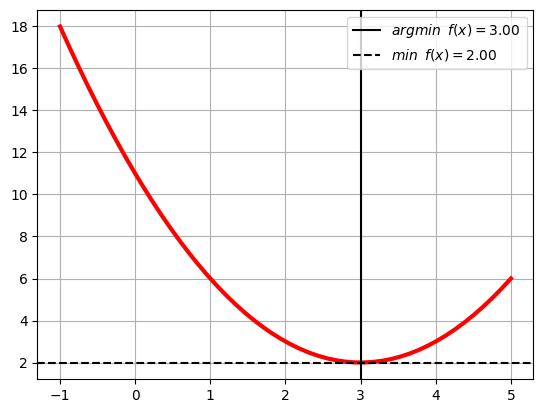

In [ ]:
## KEEPOUTPUT
xr = np.linspace(-1,5)
plt.plot(xr, f(xr), color="red", lw=3)
plt.grid();
plt.axvline(r.x, color="black", label=r"$arg min \;\;f(x)=%.2f$"%r.x)
plt.axhline(r.fun, color="black", ls="--", label=r"$min \;\;f(x)=%.2f$"%r.fun)
plt.legend()


the minimum might be local

In [ ]:
f = lambda x: (x-3)**2*np.sin(x)**2+x

initx = np.random.random()*6-1

r = minimize(f, method="BFGS", x0=initx) 
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.02684262682441161
        x: [-5.283e-02]
      nit: 3
      jac: [ 1.193e-06]
 hess_inv: [[ 5.051e-02]]
     nfev: 10
     njev: 5

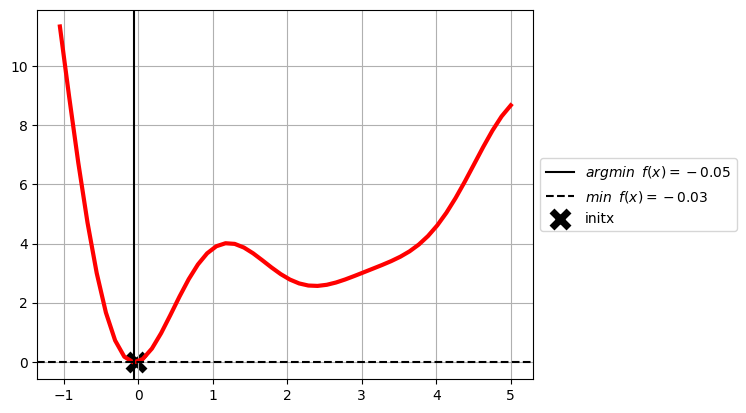

In [ ]:
## KEEPOUTPUT
xr = np.linspace(np.min([-1,r.x-1]), np.max([5, r.x+1]))
plt.plot(xr, f(xr), color="red", lw=3)
plt.grid();
plt.axvline(r.x, color="black", label=r"$arg min \;\;f(x)=%.2f$"%r.x)
plt.axhline(r.fun, color="black", ls="--", label=r"$min \;\;f(x)=%.2f$"%r.fun)
plt.scatter(initx, f(initx), color="black", marker="x", lw=5, s=150, label="initx")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Initx: punto de inicio en el que empieza la busqueda el algoritmo

Hay una dependencia muy grande del valor inicial

### minimizing a multivariable function

Given a function

$$f(x)=(x0*x1-3)^2+2$$

We want to find the minimum value of the function

$$\underset{x_0,x_1}{\text{min}} \;\;f(x_0, x_1)$$

and the value of $x$ at which the minimum value is reached

$$\underset{x_0,x_1}{\text{arg min}} \;\;f(x_0, x_1)$$

In [ ]:
f = lambda x0,x1: x0**2+x1**2

In [ ]:
initx = np.random.random(size=2)*10-5
r = minimize(lambda x: f(*x), method="BFGS", x0=initx)
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.6726396257727885e-14
        x: [-1.258e-07 -3.020e-08]
      nit: 3
      jac: [-2.366e-07 -4.549e-08]
 hess_inv: [[ 9.852e-01  8.474e-02]
            [ 8.474e-02  5.148e-01]]
     nfev: 12
     njev: 4

In [ ]:
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)

X0, X1 = np.meshgrid(x0, x1)
Z = f(X0, X1)

In [ ]:
## KEEPOUTPUT
plot3D(X0,X1,Z, initx, r.x)

observe how we use vectorization out of the box, and a meshgrid with all possible input values for $x_0$ and $x_1$

In [ ]:
## KEEPOUTPUT
x0.shape, x1.shape, X0.shape, X1.shape, Z.shape

((100,), (100,), (100, 100), (100, 100), (100, 100))

Text(0.5, 1.0, 'X1')

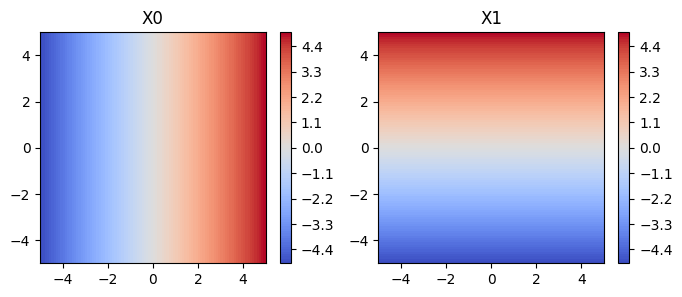

In [ ]:
## KEEPOUTPUT
plt.figure(figsize=(8,3))
plt.subplot(121); plt.contourf(X0, X1, X0, levels=len(x0), cmap=plt.cm.coolwarm); plt.colorbar(); plt.title("X0")
plt.subplot(122); plt.contourf(X0, X1, X1, levels=len(x1), cmap=plt.cm.coolwarm); plt.colorbar(); plt.title("X1")


In [ ]:
f = lambda x0,x1: np.cos(.5*x1)+np.sin(.5*x0)

In [ ]:
sigm = lambda x: 1/(1+np.exp(-x))
f = lambda x0,x1: sigm(2*np.sin(2*x0)*np.cos(2*x1)*(.1*x0+1)**2)


In [ ]:
def log(xk):
    h.append(xk)
    
initx = np.random.random(size=2)*10-5
h = [initx]
r = minimize(lambda x: f(*x), method="BFGS", x0=initx, callback=log)
h = np.r_[h]
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0881479712474658
        x: [ 8.314e-01  4.712e+00]
      nit: 8
      jac: [-3.225e-06 -4.138e-06]
 hess_inv: [[ 1.213e+00 -1.251e-01]
            [-1.251e-01  1.179e+00]]
     nfev: 45
     njev: 15

In [ ]:
np.min(h, axis=0), np.max(h, axis=0)

(array([0.0766333 , 3.30779559]), array([0.83142538, 4.87090259]))

In [ ]:
## KEEPOUTPUT
x0 = np.linspace(np.min(h[:,0]-1), np.max(h[:,0]+1), 50)
x1 = np.linspace(np.min(h[:,1]-1), np.max(h[:,1]+1), 50)

X0, X1 = np.meshgrid(x0, x1)
Z = f(X0, X1)

plot3D(X0,X1,Z, initx, r.x, h) #r.x es un atributo del objeto OptimizeResult que devuelve la solución encontrada por el algoritmo de optimización.